# Exploratory Data Analysis on the Walmart Dataset

## import required lib


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## read data

In [7]:
filepath = '/content/drive/MyDrive/M5forcasting/data'

In [8]:
calendar = pd.read_csv(filepath +'/calendar.csv')
sample_submission = pd.read_csv(filepath +'/sample_submission.csv')
sell_prices = pd.read_csv(filepath +'/sell_prices.csv')
sales_train_validation = pd.read_csv(filepath +'/sales_train_validation.csv')
sales_train_evaluation = pd.read_csv(filepath +'/sales_train_evaluation.csv')

In [9]:
print('calendar shape : ' , calendar.shape)
calendar.head(5)

calendar shape :  (1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


note : weekday 1 = saturday , 7 = friday

In [10]:
print(calendar['event_type_1'].unique())
print(calendar['event_name_1'].unique())
print(calendar['event_type_2'].unique())
print(calendar['event_name_2'].unique())

[nan 'Sporting' 'Cultural' 'National' 'Religious']
[nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
[nan 'Cultural' 'Religious']
[nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]


In [11]:
print('sales_train_validation_shape : ' , sales_train_validation.shape)
sales_train_validation.head(5)

sales_train_validation_shape :  (30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [12]:
print('sales_train_evaluation_shape : ' , sales_train_evaluation.shape)
sales_train_evaluation.head(5)

sales_train_evaluation_shape :  (30490, 1947)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


### forecast sales for 28 forecast days. The sample submission has the following format:

In [13]:
print('sample_submission_shape : ' , sample_submission.shape)
sample_submission.head(5)

sample_submission_shape :  (60980, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#find what inside sample_submission
print(sample_submission['id'].value_counts())
print('\n')
print(sample_submission[sample_submission.id.str.contains("evaluation")].value_counts())

HOBBIES_1_001_CA_1_validation      1
HOUSEHOLD_1_466_CA_4_evaluation    1
HOUSEHOLD_1_454_CA_4_evaluation    1
HOUSEHOLD_1_455_CA_4_evaluation    1
HOUSEHOLD_1_456_CA_4_evaluation    1
                                  ..
FOODS_2_210_TX_3_validation        1
FOODS_2_211_TX_3_validation        1
FOODS_2_212_TX_3_validation        1
FOODS_2_213_TX_3_validation        1
FOODS_3_827_WI_3_evaluation        1
Name: id, Length: 60980, dtype: int64


id                               F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  F11  F12  F13  F14  F15  F16  F17  F18  F19  F20  F21  F22  F23  F24  F25  F26  F27  F28
FOODS_1_001_CA_1_evaluation      0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0      1
HOUSEHOLD_1_032_CA_3_evaluation  0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0      1
HOUSEHOLD_1_033_TX_1_evaluation  0   0   0   0   0   0

evaluation 30490 row and validation 30490 row with column = 29 (28 days forcasting)

## Merge Datafram to show datastamp


In [15]:
d_cols = [c for c in sales_train_validation.columns if 'd_' in c]

In [16]:
train_sales_datestamp_df = sales_train_validation.set_index('id')[d_cols].T.merge(calendar.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

### Some chart on cat_id with datestamp

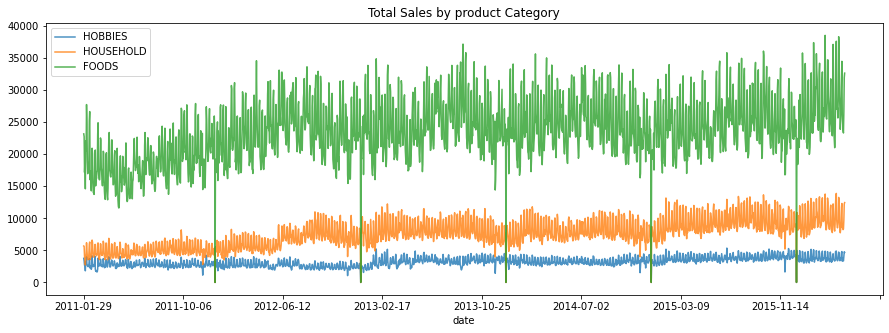

In [17]:
for i in sales_train_validation['cat_id'].unique():
    items_col = [c for c in train_sales_datestamp_df.columns if i in c]
    train_sales_datestamp_df[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by product Category')
plt.legend(sales_train_validation['cat_id'].unique())
plt.show()

In [18]:
train_sales_datestamp_df.head()

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [19]:
train_sales_datestamp_df.index

Index(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01', '2011-02-02',
       '2011-02-03', '2011-02-04', '2011-02-05', '2011-02-06', '2011-02-07',
       ...
       '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
       '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23', '2016-04-24'],
      dtype='object', name='date', length=1913)

In [50]:
train_sales_datestamp_df.shape

(1913, 30490)

the last datestamp is 2016-04-24

In [64]:
train_sales_datestamp_df.iloc[-28:1913]
#test slice dataframe

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,
2016-03-28,1,1,0,0,1,0,1,0,0,0,...,5,2,1,0,3,0,0,1,3,7
2016-03-29,0,0,0,0,0,1,2,11,2,1,...,0,1,3,0,0,0,0,0,0,3
2016-03-30,0,0,0,0,4,3,0,5,0,1,...,5,1,2,0,1,0,0,0,0,1
2016-03-31,0,0,0,0,4,0,0,2,1,1,...,3,3,1,0,2,0,0,0,0,4
2016-04-01,0,0,0,3,0,0,1,12,2,1,...,1,4,3,0,2,0,0,0,0,3
2016-04-02,0,0,0,1,1,0,0,38,0,0,...,2,3,3,0,2,0,1,1,0,3
2016-04-03,1,0,1,2,4,0,0,22,3,3,...,0,3,3,1,3,0,1,1,1,1
2016-04-04,0,0,0,1,0,0,0,2,0,2,...,0,1,3,0,3,0,2,2,1,2
2016-04-05,4,0,0,3,1,0,0,0,0,2,...,0,6,3,0,1,0,0,1,2,3


# objective to forcasting quantities of each product id sales in total (not separate by branch and state)

### FB Prophet Forecast Using Individual Product IDs

#### prepare for FB Prophet : holidays

In [20]:
#for prophet model:
# ~ is not contain (Tilde in condition python mean It means bitwise not, inversing boolean mask)
df_event_1 = pd.DataFrame({'holiday': 'Event 1', 'ds': calendar[~calendar['event_name_1'].isna()]['date']})
df_event_2 = pd.DataFrame({'holiday': 'Event 2', 'ds': calendar[~calendar['event_name_2'].isna()]['date']})
df_snapca = pd.DataFrame({'holiday': 'snap_CA', 'ds': calendar[calendar['snap_CA'] == 1]['date']})
df_snaptx = pd.DataFrame({'holiday': 'snap_TX', 'ds': calendar[calendar['snap_TX'] == 1]['date']})
df_snapwi = pd.DataFrame({'holiday': 'snap_WI', 'ds': calendar[calendar['snap_WI'] == 1]['date']})
holidays = pd.concat((df_event_1, df_event_2, df_snapca, df_snaptx, df_snapwi))
holidays.sample(7)

,holiday,ds
229,snap_TX,2011-09-15
556,snap_TX,2012-08-07
85,Event 2,2011-04-24
1127,snap_CA,2014-03-01
1220,snap_CA,2014-06-02
564,snap_TX,2012-08-15
1587,Event 1,2015-06-04


#### prep input data (one id) 

In [43]:
def single_id_ts_input(idx, threshold_date='2016-02-02'):
    
    '''
    selects and makes the timeseries adjusted for fb prophet model by adjusting names
    of columns
    
    inputs: product_id
    
    returns: time series with data specified in format for prophet
    
    '''
    datestamp = [date for date in train_sales_datestamp_df.index]
    id_series =  sales_train_validation[(sales_train_validation.id == idx )]
    item_ts = pd.DataFrame({'ds': datestamp}, index=range(len(datestamp)))
    item_ts['y'] = id_series[d_cols].T.values.reshape(-1)

    #Choosing the threshold date near to the date where prediction needs to be made 
    # threshold_date='2016-02-22'
    # threshold_date = pd.to_datetime(date) 
    filter = item_ts['ds'] > threshold_date

    single_id_ts_input = item_ts[filter][['ds', 'y']]
    
    
    return single_id_ts_input


In [44]:
#@title
# item_ts['y'] = id_series[d_cols].T.values.reshape(-1)
# len([date for date in train_sales_datestamp_df.index])
# same

# sales_train_validation[(sales_train_validation.id == 'FOODS_3_090_CA_3_validation' )].values[0].transpose()

# sales_train_validation[(sales_train_validation.id == 'FOODS_3_090_CA_3_validation' )].T.values.reshape(-1)  #### reshape(-1) is flatten

In [45]:
#@title
# exsample_id = 'FOODS_3_090_CA_3_validation'

# datestamp = [date for date in train_sales_datestamp_df.index]
# id_series =  sales_train_validation[(sales_train_validation.id == exsample_id )]
# item_ts = pd.DataFrame({'ds': datestamp}, index=range(len(datestamp)))
# item_ts['y'] = id_series[d_cols].T.values.reshape(-1)
# item_ts

In [46]:
#@title
# threshold_date='2016-02-22'
# # threshold_date = pd.to_datetime(date) 
# filter = item_ts['ds'] > threshold_date

# item_ts_filter = item_ts[filter][['ds', 'y']]
# item_ts_filter.sample(10)

#### test fit and plot fb prophet (one id)

In [47]:
def prophet_plot(data, periods=28, freq='D'):
    
    '''
    plots the fb prophet model for the data of id specified
    
    inputs: data (product id along with data for previous days), periods(predictions for 
    the next days to be made)
    
    returns: plots the immediate historic data along with forecast for the future made
    '''
    
    mod_params = { 'weekly_seasonality': True, 'seasonality_mode': 'multiplicative'} 

    sales_model = Prophet(**mod_params, holidays=holidays, interval_width=0.95)
    #data['cap'] = data['y'].max() + data['y'].std() * 0.05 #incase logistic model growth used
    #fitting the model
    sales_model.fit(data)
    future = sales_model.make_future_dataframe(periods, freq)
    #future['cap'] = data['cap'].max() #incase logistic model growth used in params

    sales_forecast = sales_model.predict(future)
    print(sales_forecast[['ds', 'yhat']].tail(28))
    
    
    plt.figure(figsize=(15,3))
    #fig, ax = plt.subplots(figsize=(14,5))
    sales_model.plot(sales_forecast, xlabel='Date', ylabel='Unit Sales Behavior')
    #plt.axvline(x=sales_forecast[sales_forecast.ds == '2016-04-22']['ds'], color='r')
    #ax.axvline(threshold_date, color='g', linestyle='--', label='Prediction Onwards')
    #ax.legend(loc='upper left')
    #ax.set(title='Avg Sales of Units', ylabel='');
    plt.title("Unit Sales Trend on Each ID")
    plt.show()

    


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9xcj88w6/pj3uq6wf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9xcj88w6/g35heqdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46674', 'data', 'file=/tmp/tmp9xcj88w6/pj3uq6wf.json', 'init=/tmp/tmp9xcj88w6/g35heqdl.json', 'output', 'file=/tmp/tmp9xcj88w6/prophet_modelx76v1z5w/prophet_model-20221115152506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:25:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds        yhat
82  2016-04-25   86.054407
83  2016-04-26   88.087221
84  2016-04-27   90.623316
85  2016-04-28   97.133568
86  2016-04-29  137.864506
87  2016-04-30  175.686182
88  2016-05-01  149.662140
89  2016-05-02   75.024760
90  2016-05-03   83.601396
91  2016-05-04   90.229023
92  2016-05-05   99.381615
93  2016-05-06  133.620780
94  2016-05-07  175.578327
95  2016-05-08  133.198180
96  2016-05-09   81.977119
97  2016-05-10   88.126755
98  2016-05-11   87.445695
99  2016-05-12   94.018755
100 2016-05-13  145.860199
101 2016-05-14  160.030967
102 2016-05-15  134.591963
103 2016-05-16   87.374757
104 2016-05-17   89.437774
105 2016-05-18   92.011740
106 2016-05-19   98.620649
107 2016-05-20  139.973626
108 2016-05-21  171.598722
109 2016-05-22  139.406239


<Figure size 1080x216 with 0 Axes>

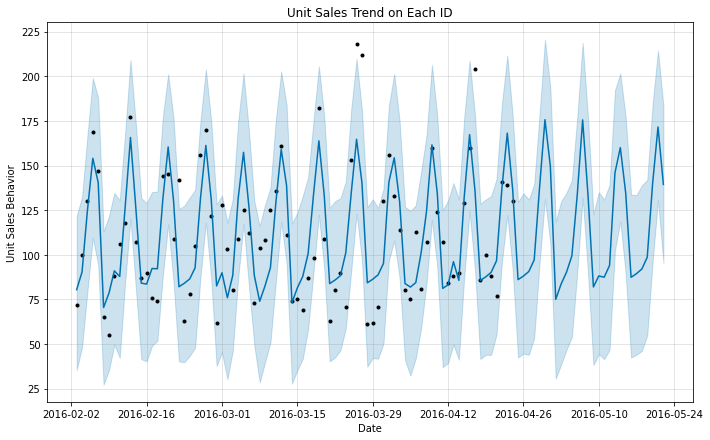

In [48]:
exsample_id = 'FOODS_3_090_CA_3_validation'
single_id1_ts = single_id_ts_input(exsample_id)
prophet_plot(single_id1_ts)

## All id forcast with fb prophet

### All id time series preparation

In [ ]:
# train_sales_datestamp_df.iloc[-28:1913]
sales_forecast_list = []

In [ ]:
def prophet_pred_df(start=1913, end=2100):
    '''
    makes a dataframe with prophet predictions made for each product_id 
    
    input: start = product_id start, end = product_id to be the last one for prediction
    
    returns: dataframe with predictions made for the next 28 days using prophet of the product
             ids specified in input
    '''

    for idc in tqdm(range(start, end)):
        train_sub = train_sales_cal_df.iloc[-28:, idc].reset_index()
        idx = train_sub.columns[1]
        train_sub.set_axis(['ds', 'y'], axis=1, inplace=True)
        mod_params = { 'changepoint_prior_scale': 0.5 , 'changepoint_range': 0.6,
                      'n_changepoints': 50, 
                      'weekly_seasonality': True, 'seasonality_mode': 'multiplicative'} 
        sales_model = Prophet(**mod_params, interval_width=0.95)
        #data['cap'] = data['y'].max() + data['y'].std() * 0.05 #incase logistic model growth used

        ######fitting the prophet model########
        
        sales_model.fit(train_sub)
        future = sales_model.make_future_dataframe(28, 'D')
        #future['cap'] = data['cap'].max() #incase logistic model growth used in params
        sales_forecast = sales_model.predict(future)[-28:]
        sales_forecast_list.append( (np.append(np.array([idx]), sales_forecast['yhat'].values.transpose())) )
    
    return sales_forecast_list

#list_table would collect all entries

list_table = prophet_pred_df()

# Misc. Note for work


### Seasonality, Holiday Effects, And Regressors 

Modeling Holidays and Special Events
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#modeling-holidays-and-special-events

In [13]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [16]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1
